<div style="text-align:left; padding:5px;color:#663399;margin:0;font-size:40px;font-family:Serif;display:fill;border-radius:5px;background-color:white;overflow:hidden"><b>Tree-Based / Impurity Based Feature Selection</b></div>

# <div style="text-align:left; padding:20px;color:lightgrey;margin:0;font-size:20px;font-family:Serif;display:fill;border-radius:5px;background-color:#663399;overflow:hidden"><b>Basic Understanding of Impurity Based Feature Selection</b></div>

Feature selection with impurity-based methods involves selecting features based on their ability to decrease impurity (e.g., Gini impurity or entropy) in decision tree-based models. 

Here's how it typically works:

1. Training Decision Trees: Initially, a decision tree algorithm is used to train a model on the dataset. During training, the algorithm selects features at each node to split the data in a way that minimizes impurity.
2. Evaluating Feature Importance: After the decision tree model is trained, the importance of each feature is calculated based on how much it contributes to reducing impurity across all the decision nodes in the tree.
3. Selecting Features: Features with higher importance values are considered more relevant for classification or regression tasks. Feature selection involves choosing the top N features with the highest importance scores.
4. Building New Model: Once the top features are selected, a new model is trained using only those selected features. This reduces the dimensionality of the dataset and focuses the model's attention on the most informative features.
5. Evaluating Model Performance: Finally, the performance of the new model is evaluated using the selected features. This can be done using metrics such as accuracy, precision, recall, or F1-score, depending on the specific task.

# <div style="text-align:left; padding:20px;color:lightgrey;margin:0;font-size:20px;font-family:Serif;display:fill;border-radius:5px;background-color:#663399;overflow:hidden"><b>Pros & Cons of Tree-based / Impurity-based Feature Selection Methods</b></div>

**Pros:**

1. **Automatic Feature Selection:** Decision tree-based models inherently perform feature selection during the training process. Features that contribute the most to reducing impurity are automatically selected for splitting nodes, leading to a reduction in dimensionality and potentially improving model performance.

2. **Interpretability:** Decision trees are highly interpretable models. By selecting features based on impurity reduction, the resulting feature set can be easily understood and interpreted by domain experts.

3. **Non-linear Relationships:** Decision trees can capture non-linear relationships between features and the target variable. By selecting features based on their importance in reducing impurity, the model can effectively capture complex patterns in the data.

4. **Handles Mixed Data Types:** Decision trees can handle both numerical and categorical features without the need for pre-processing such as one-hot encoding. This makes them versatile for datasets with mixed data types.

**Cons:**

1. **Overfitting:** Decision trees are prone to overfitting, especially when the depth of the tree is not controlled. In feature selection, selecting features based solely on impurity reduction may lead to overfitting if irrelevant features are given too much importance.

2. **Bias Towards High Cardinality Features:** Features with high cardinality (i.e., many unique values) may be favored during feature selection because they can potentially lead to more splits and greater impurity reduction. This bias can result in ignoring informative but low cardinality features.

3. **Sensitive to Small Variations:** Decision tree feature selection can be sensitive to small variations in the data, leading to different feature importance rankings for similar datasets. This instability can make it challenging to rely solely on feature importances for feature selection.

4. **Limited Generalization:** While decision trees can capture complex relationships in the training data, they may not generalize well to unseen data, especially if the dataset is noisy or if the decision tree is deep. This limitation can affect the effectiveness of feature selection based on impurity reduction.

In summary, tree-based or impurity-based feature selection methods offer automatic selection of relevant features and interpretability but may suffer from overfitting, bias towards high cardinality features, sensitivity to small variations, and limited generalization. These factors should be carefully considered when using such methods in practice. Regularization techniques and ensemble methods like random forests or gradient boosting can help alleviate some of these limitations.

# <div style="text-align:left; padding:20px;color:lightgrey;margin:0;font-size:20px;font-family:Serif;display:fill;border-radius:5px;background-color:#663399;overflow:hidden"><b>Overview of Analysis Workflow</b></div>

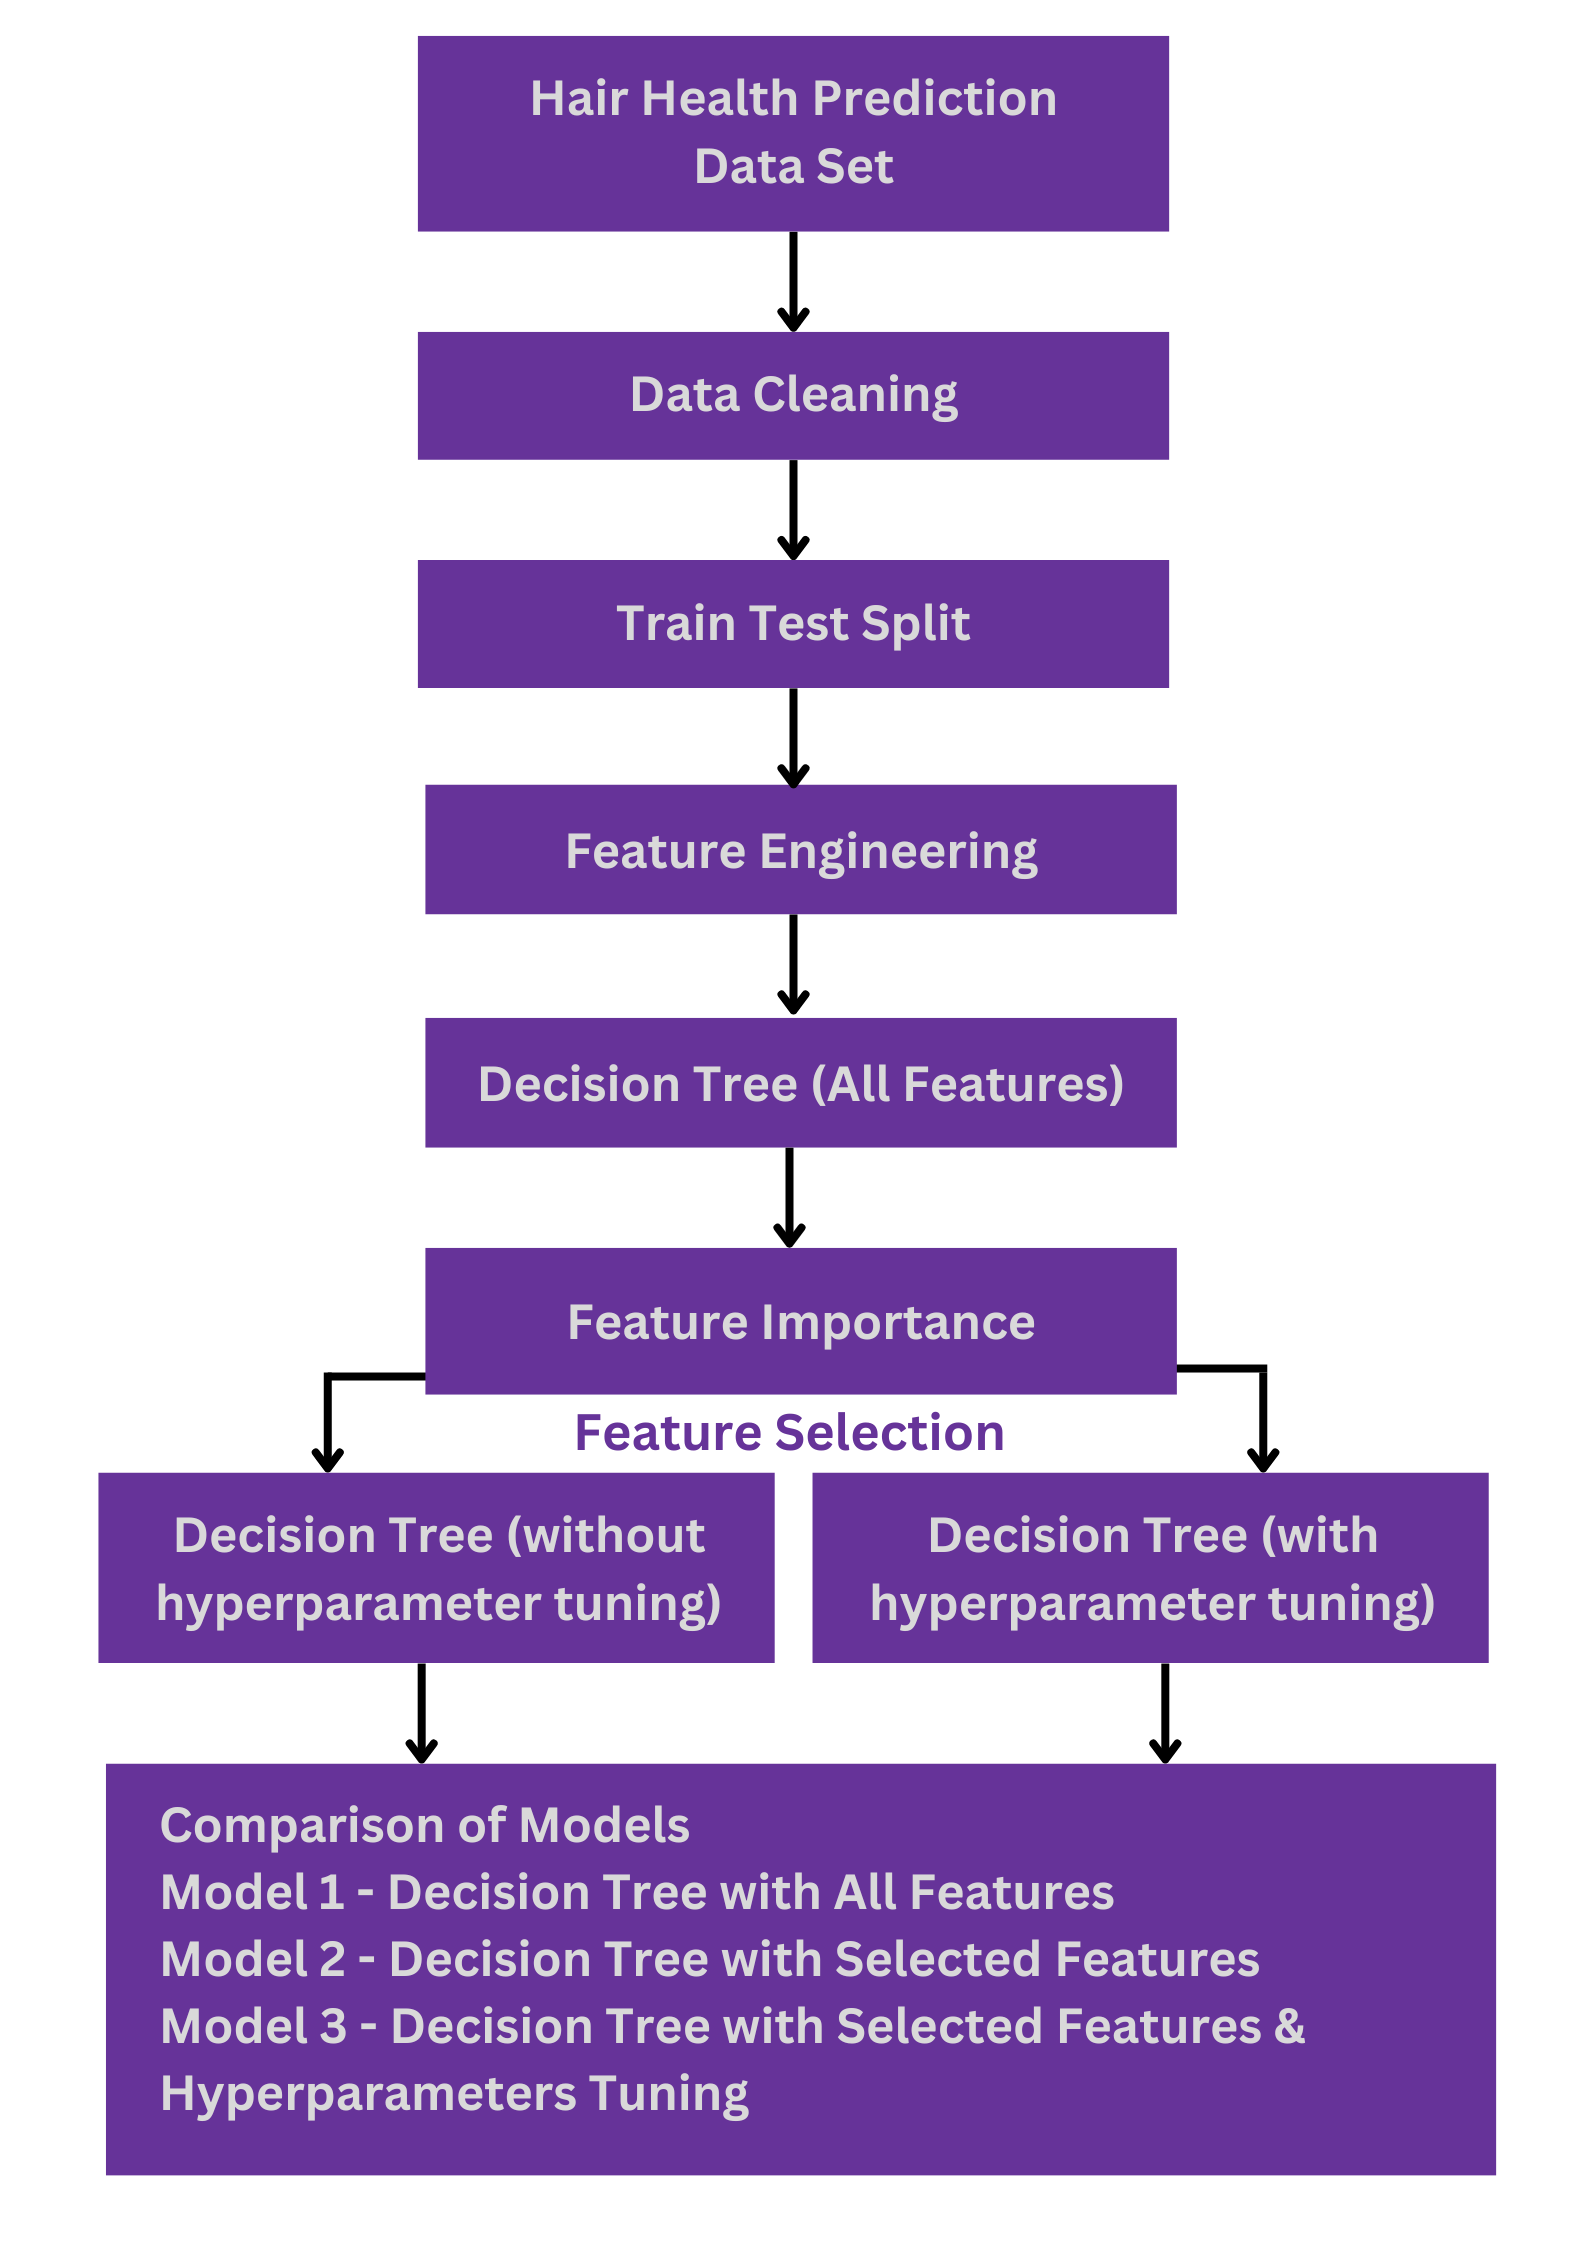

# <div style="text-align:left; padding:20px;color:lightgrey;margin:0;font-size:20px;font-family:Serif;display:fill;border-radius:5px;background-color:#663399;overflow:hidden"><b>Import Essential Libraries for Data Analytics</b></div>

In [52]:
# import essential libraries for data analytics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# <div style="text-align:left; padding:20px;color:lightgrey;margin:0;font-size:20px;font-family:Serif;display:fill;border-radius:5px;background-color:#663399;overflow:hidden"><b>Data Loading</b></div>

In [53]:
# load the dataset
data = pd.read_csv('Predict Hair Fall.csv')

# check the dimension of the dataset
num_row, num_col = data.shape
print('The dataset contains {} rows and {} columns.'.format(num_row, num_col))

# check the attributes in the dataset
attributes = list(data.columns)
print('\nAttributes in the dataset: ', ', '.join(attributes))

# view the first 5 rows of the dataset
data.head()

The dataset contains 999 rows and 13 columns.

Attributes in the dataset:  Id, Genetics, Hormonal Changes, Medical Conditions, Medications & Treatments, Nutritional Deficiencies , Stress, Age, Poor Hair Care Habits , Environmental Factors, Smoking, Weight Loss , Hair Loss


,Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
0,133992,Yes,No,No Data,No Data,Magnesium deficiency,Moderate,19,Yes,Yes,No,No,0
1,148393,No,No,Eczema,Antibiotics,Magnesium deficiency,High,43,Yes,Yes,No,No,0
2,155074,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,Yes,Yes,No,Yes,0
3,118261,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,Yes,Yes,No,No,0
4,111915,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,30,No,Yes,Yes,No,1


In [54]:
# summary of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Id                         999 non-null    int64 
 1   Genetics                   999 non-null    object
 2   Hormonal Changes           999 non-null    object
 3   Medical Conditions         999 non-null    object
 4   Medications & Treatments   999 non-null    object
 5   Nutritional Deficiencies   999 non-null    object
 6   Stress                     999 non-null    object
 7   Age                        999 non-null    int64 
 8   Poor Hair Care Habits      999 non-null    object
 9   Environmental Factors      999 non-null    object
 10  Smoking                    999 non-null    object
 11  Weight Loss                999 non-null    object
 12  Hair Loss                  999 non-null    int64 
dtypes: int64(3), object(10)
memory usage: 101.6+ KB


# <div style="text-align:left; padding:20px;color:lightgrey;margin:0;font-size:20px;font-family:Serif;display:fill;border-radius:5px;background-color:#663399;overflow:hidden"><b>Data Types for Independent Variables</b></div>

In [55]:
# identify the data type for each independent variables

# binary data
binaryVar = ['Genetics','Hormonal Changes','Poor Hair Care Habits','Environmental Factors','Smoking','Weight Loss']
# categorical data
categoricalVar = ['Medical Conditions','Medications & Treatments','Nutritional Deficiencies']
# ordinal data
ordinalVar = ['Stress']
# continuous numeric data
continuousVar = ['Age']

# <div style="text-align:left; padding:20px;color:lightgrey;margin:0;font-size:20px;font-family:Serif;display:fill;border-radius:5px;background-color:#663399;overflow:hidden"><b>Data Cleaning</b></div>

In [56]:
# exclude 'Id' from the analysis
data.drop(columns=['Id'], axis=1, inplace=True)

# remove the white space before and after the column names
colNames = [col.strip() for col in data.columns]
data.columns = colNames

# replace the value 'No Data' in the dataset to nan value
# imputation will be performed in the later stage
data.replace({'No Data': np.nan}, inplace=True)

# convert the data type of 'Stress' into ordinal level
desired_order_map = {'Low':0, 'Moderate':1, 'High':2}
data['Stress'] = data['Stress'].map(desired_order_map)

# <div style="text-align:left; padding:20px;color:lightgrey;margin:0;font-size:20px;font-family:Serif;display:fill;border-radius:5px;background-color:#663399;overflow:hidden"><b>Train Test Split</b></div>

In [57]:
# split the dataset into train test split (80:20)
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, stratify=data['Hair Loss'], shuffle=True, random_state=122)

# check the dimension of the training and test dataset
print('Dimension of training dataset: ', train.shape)
print('Dimension of test dataset: ', test.shape)

Dimension of training dataset:  (799, 12)
Dimension of test dataset:  (200, 12)


In [58]:
# segregate the feature matrix and target vector from the training and test dataset
Xtrain = train.drop(columns=['Hair Loss'], axis=1)
ytrain = train['Hair Loss']

Xtest = test.drop(columns=['Hair Loss'], axis=1)
ytest = test['Hair Loss']

# <div style="text-align:left; padding:20px;color:lightgrey;margin:0;font-size:20px;font-family:Serif;display:fill;border-radius:5px;background-color:#663399;overflow:hidden"><b>Distribution of Classes in Target</b></div>

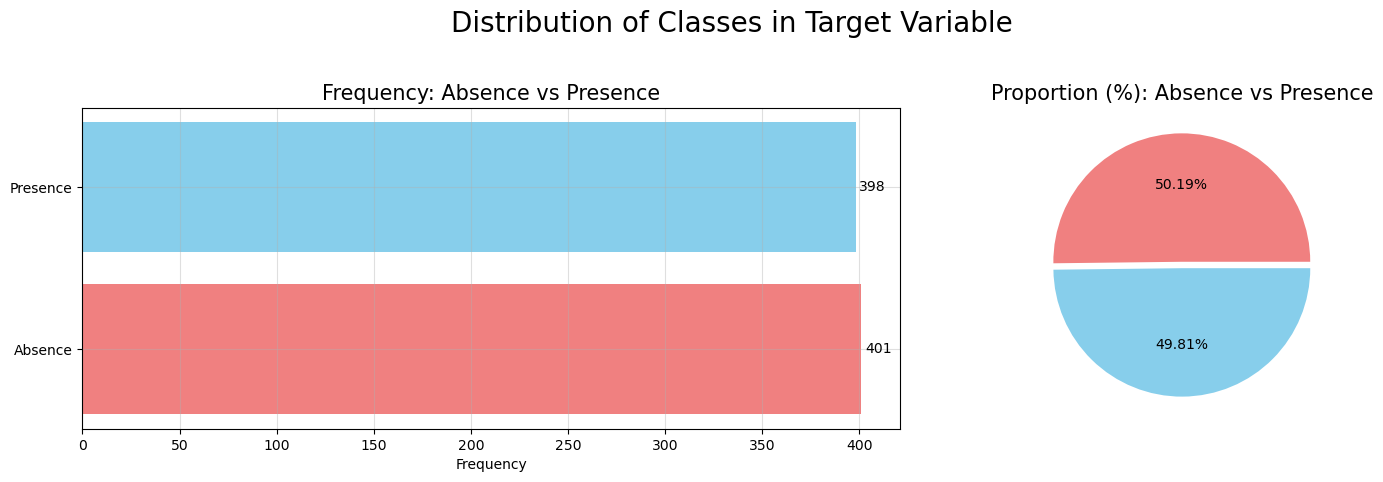

In [59]:
# distribution of the classes in target
target = ytrain.value_counts()

figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[1.5,1]})
axes[0].barh(y=['Absence','Presence'], width=target.values, color=['lightcoral','skyblue'])
axes[0].grid(alpha=0.4)
axes[0].set_xlabel('Frequency')
axes[0].set_title('Frequency: Absence vs Presence', fontsize=15)

for index, values in enumerate(target):
    axes[0].text(values+2, index, str(values), va='center')

axes[1].pie(target.values, autopct='%.2f%%', explode=[0.05,0], colors=['lightcoral','skyblue'])
axes[1].set_title('Proportion (%): Absence vs Presence', fontsize=15)

figure.suptitle('Distribution of Classes in Target Variable', fontsize=20)
plt.tight_layout(pad=2)
plt.show()

# <div style="text-align:left; padding:20px;color:lightgrey;margin:0;font-size:20px;font-family:Serif;display:fill;border-radius:5px;background-color:#663399;overflow:hidden"><b>Feature Engineering (Imputation, Encoding, Scaling)</b></div>

In [60]:
# impute the nan values in the dataset with the mode
from sklearn.impute import SimpleImputer

# column names
colNames = Xtrain.columns

# create a SimpleImputer class
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

Xtrain_imputed = imp.fit_transform(Xtrain)                # imputation for training dataset
Xtrain = pd.DataFrame(Xtrain_imputed, columns=colNames)   # convert back to pandas dataframe

Xtest_imputed = imp.transform(Xtest)                      # imputation for test dataset
Xtest = pd.DataFrame(Xtest_imputed, columns=colNames)     # convert back to pandas dataframe

In [61]:
from sklearn.preprocessing import OrdinalEncoder

# perform ordinal encoding to variable 'stress'
ordinal_encoder = OrdinalEncoder()
stress_train_encoded = ordinal_encoder.fit_transform(Xtrain['Stress'].to_frame())
stress_test_encoded = ordinal_encoder.transform(Xtest['Stress'].to_frame())

In [62]:
from sklearn.preprocessing import OneHotEncoder

# helper function to perform one hot encoding for binary and caegorical features in training and test dataset
def onehotencoding(features, train, test):
    training_list = []
    test_list = []
    
    train.reset_index(drop=True, inplace=True)
    test.reset_index(drop=True, inplace=True)
    
    for feat in features:
        # Create OneHotEncoder object
        encoder = OneHotEncoder(sparse_output=False, drop='if_binary')
        
        # Fit and transform the training data
        feat_train_encoded = encoder.fit_transform(train[feat].to_frame())
        feat_train_df = pd.DataFrame(feat_train_encoded, columns=encoder.get_feature_names_out())
        
        # Transform the test data
        feat_test_encoded = encoder.transform(test[feat].to_frame())
        feat_test_df = pd.DataFrame(feat_test_encoded, columns=encoder.get_feature_names_out())
        
        # Append the DataFrames to lists
        training_list.append(feat_train_df)
        test_list.append(feat_test_df)
    
    return training_list, test_list

In [63]:
# list of features to be encoded with OneHotEncoding technique
onehot_features = binaryVar + categoricalVar

# encode the categorical features in train and test dataset
oh_encoded_features = onehotencoding(onehot_features, Xtrain, Xtest)

# convert the encoded training and test data into dataframes
oh_encoded_train = oh_encoded_features[0]
Xtrain_processed = pd.concat(oh_encoded_train, axis=1)
Xtrain_processed['Stress'] = stress_train_encoded
Xtrain_processed['Age'] = Xtrain['Age']

oh_encoded_test = oh_encoded_features[1]
Xtest_processed = pd.concat(oh_encoded_test, axis=1)
Xtest_processed['Stress'] = stress_test_encoded
Xtest_processed['Age'] = Xtrain['Age']

In [64]:
# scale the training and test feature matrix
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain_processed)
Xtrain_scaled = pd.DataFrame(Xtrain_scaled, columns=Xtrain_processed.columns)

Xtest_scaled = scaler.transform(Xtest_processed)
Xtest_scaled = pd.DataFrame(Xtest_scaled, columns=Xtrain_processed.columns)

In [65]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# helper function to evaluate model performance
def modelPerformance(Xtrain, ytrain, Xtest, ytest, model):
    # predict classes
    ypred_train = model.predict(Xtrain)
    ypred_test = model.predict(Xtest)
    
    # predict class probabilities
    ypred_train_proba = model.predict_proba(Xtrain)
    ypred_test_proba = model.predict_proba(Xtest)

    labels = ['Absence','Presence']
    
    # classification report
    report_train = classification_report(ytrain, ypred_train, target_names=labels)
    print('Classification Report - Training Data: ')
    print(report_train)
    
    report_test = classification_report(ytest, ypred_test, target_names=labels)
    print('ClassificationReport - Test Data: ')
    print(report_test)
    
    # ROC curve
    fpr_train, tpr_train, _ = roc_curve(ytrain, ypred_train_proba[:,1])
    roc_auc_train = auc(fpr_train, tpr_train)

    fpr_test, tpr_test, _ = roc_curve(ytest, ypred_test_proba[:,1])
    roc_auc_test = auc(fpr_test, tpr_test)
    
    plt.figure(figsize=(10, 6))
    plt.plot(fpr_train, tpr_train, color='indigo', lw=2, label=f'Train ROC curve (AUC = {roc_auc_train:.2f})')
    plt.plot(fpr_test, tpr_test, color='indianred', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=20)
    plt.legend(loc='lower right')
    plt.show()
    
    # confusion matrix
    cm_train = confusion_matrix(ytrain, ypred_train, normalize='true')
    cm_test = confusion_matrix(ytest, ypred_test, normalize='true')

    figure, axes = plt.subplots(1,2, figsize=(13,5))
    sns.heatmap(cm_train, annot=True, xticklabels=labels, yticklabels=labels, cmap='BuPu', cbar=False, ax=axes[0])
    axes[0].set_title('Training', fontsize=15)
    sns.heatmap(cm_test, annot=True, xticklabels=labels, yticklabels=labels, cmap='BuPu', cbar=False, ax=axes[1])
    axes[1].set_title('Test', fontsize=15)
    figure.suptitle('Confusion Matrix', fontsize=20)
    plt.tight_layout(pad=2)
    plt.show()

# <div style="text-align:left; padding:20px;color:lightgrey;margin:0;font-size:20px;font-family:Serif;display:fill;border-radius:5px;background-color:#663399;overflow:hidden"><b>Model 1 | Decision Tree Fitted with All Features</b></div>

In [66]:
from sklearn.tree import DecisionTreeClassifier

# create a Decision Tree Classifier
tree = DecisionTreeClassifier(random_state=122)

# fitted the tree model with training data
tree.fit(Xtrain_scaled, ytrain)

DecisionTreeClassifier(random_state=122)

Classification Report - Training Data: 
              precision    recall  f1-score   support

     Absence       1.00      1.00      1.00       401
    Presence       1.00      1.00      1.00       398

    accuracy                           1.00       799
   macro avg       1.00      1.00      1.00       799
weighted avg       1.00      1.00      1.00       799

ClassificationReport - Test Data: 
              precision    recall  f1-score   support

     Absence       0.48      0.50      0.49       101
    Presence       0.47      0.44      0.46        99

    accuracy                           0.47       200
   macro avg       0.47      0.47      0.47       200
weighted avg       0.47      0.47      0.47       200



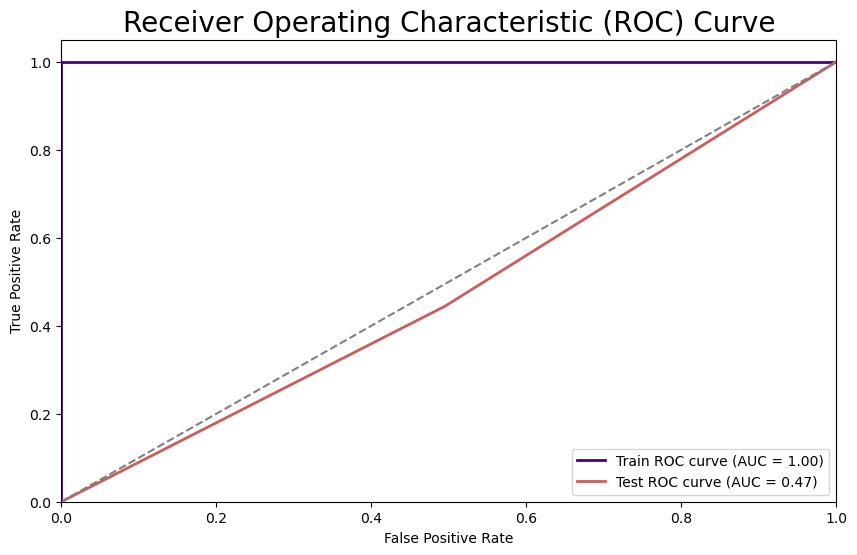

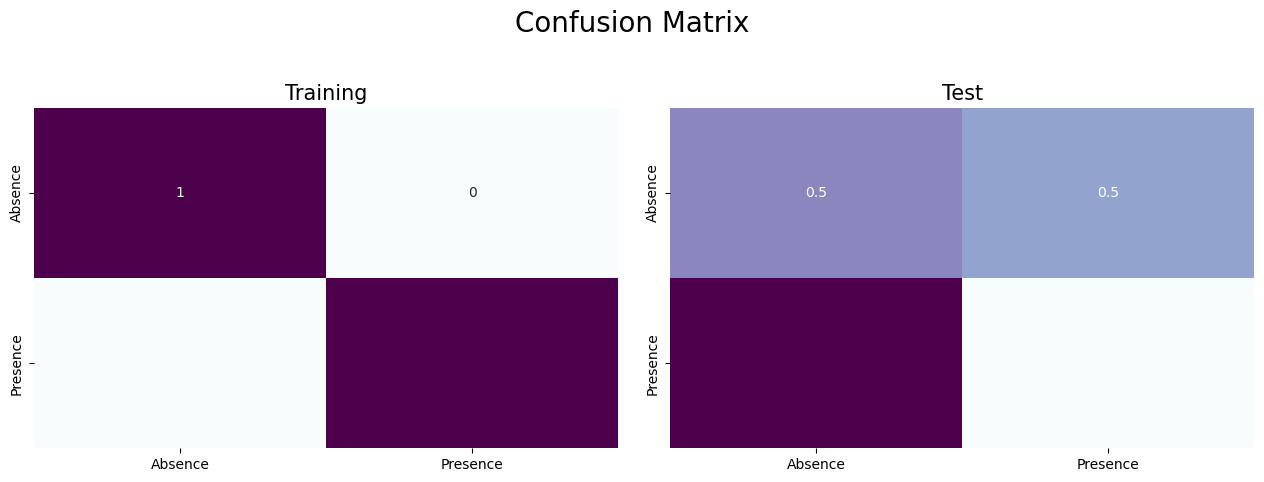

In [67]:
# performance of model fitted with all features without hyperparameter tuning
modelPerformance(Xtrain_scaled, ytrain, Xtest_scaled, ytest, tree)

# <div style="text-align:left; padding:20px;color:lightgrey;margin:0;font-size:20px;font-family:Serif;display:fill;border-radius:5px;background-color:#663399;overflow:hidden"><b>Feature Selection by Feature Importances</b></div>

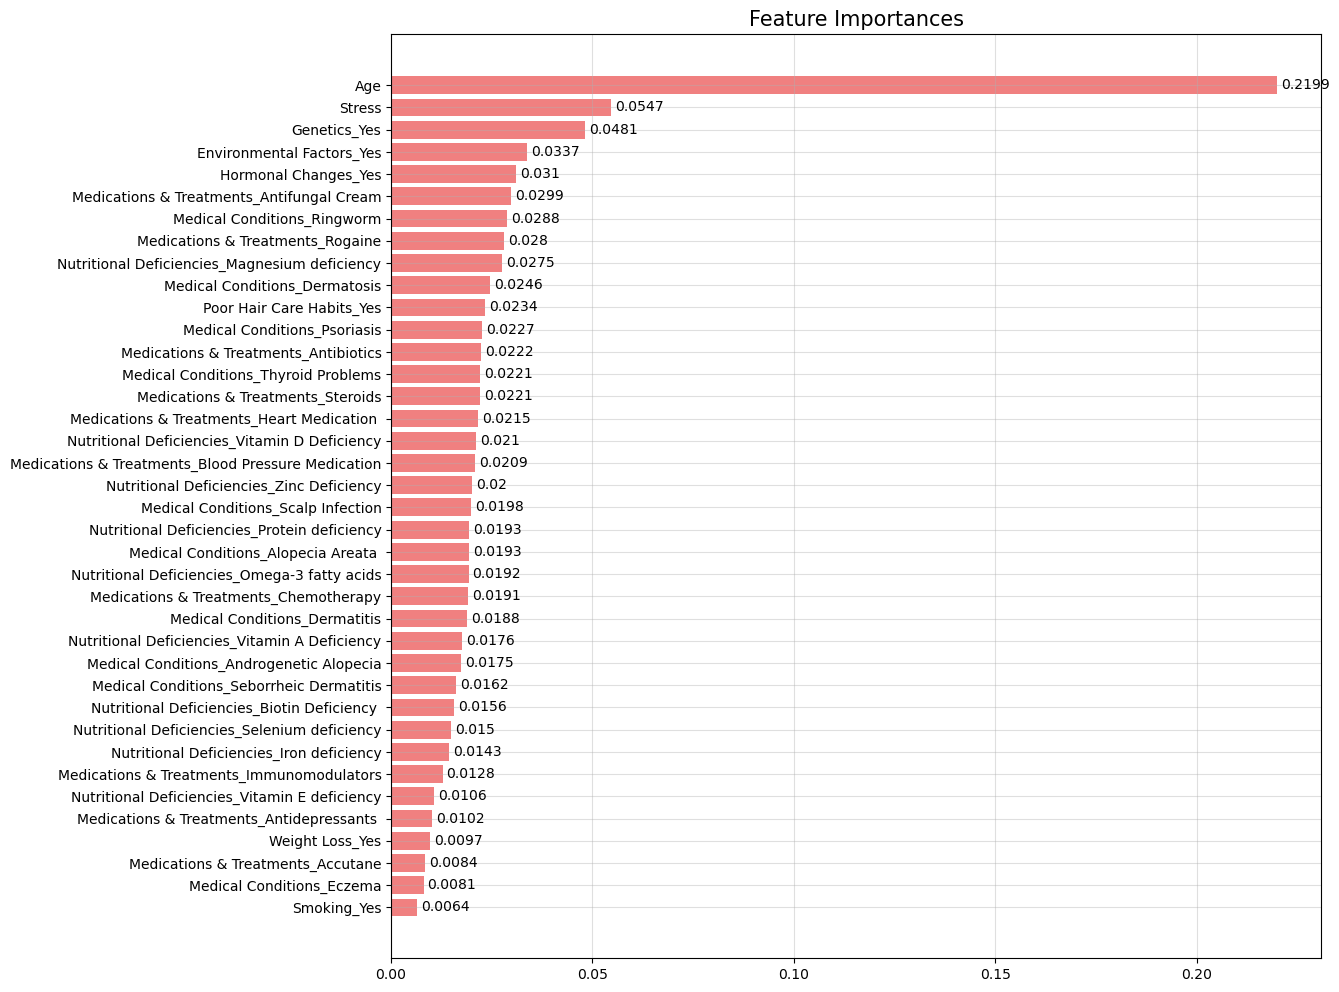

In [68]:
# extract the feature importances from model 1
featureImportances = tree.feature_importances_

# create a pandas series for the feature importances
feat_imp = pd.Series(featureImportances, index=tree.feature_names_in_).sort_values(ascending=True)

plt.figure(figsize=(12,12))
plt.barh(y=feat_imp.index, width=feat_imp.values, color='lightcoral')

for index, values in enumerate(feat_imp):
    plt.text(values+0.001, index, str(round(values,4)), va='center')


plt.grid(alpha=0.4)
plt.title('Feature Importances', fontsize=15)
plt.show()

In [69]:
# subset the features that meet threshold values for selection
selected_feats = list(feat_imp[feat_imp.values > 0.08].index)

# <div style="text-align:left; padding:20px;color:lightgrey;margin:0;font-size:20px;font-family:Serif;display:fill;border-radius:5px;background-color:#663399;overflow:hidden"><b>Model 2 | Decision Tree Fitted with Selected Features</b></div>

In [70]:
# create a Decision Tree Classifier
tree_base = DecisionTreeClassifier(random_state=122)

# fitted the tree model with selected features 
tree_base.fit(Xtrain_scaled[selected_feats], ytrain)

DecisionTreeClassifier(random_state=122)

Classification Report - Training Data: 
              precision    recall  f1-score   support

     Absence       0.58      0.66      0.61       401
    Presence       0.60      0.52      0.55       398

    accuracy                           0.59       799
   macro avg       0.59      0.59      0.58       799
weighted avg       0.59      0.59      0.58       799

ClassificationReport - Test Data: 
              precision    recall  f1-score   support

     Absence       0.53      0.56      0.55       101
    Presence       0.53      0.49      0.51        99

    accuracy                           0.53       200
   macro avg       0.53      0.53      0.53       200
weighted avg       0.53      0.53      0.53       200



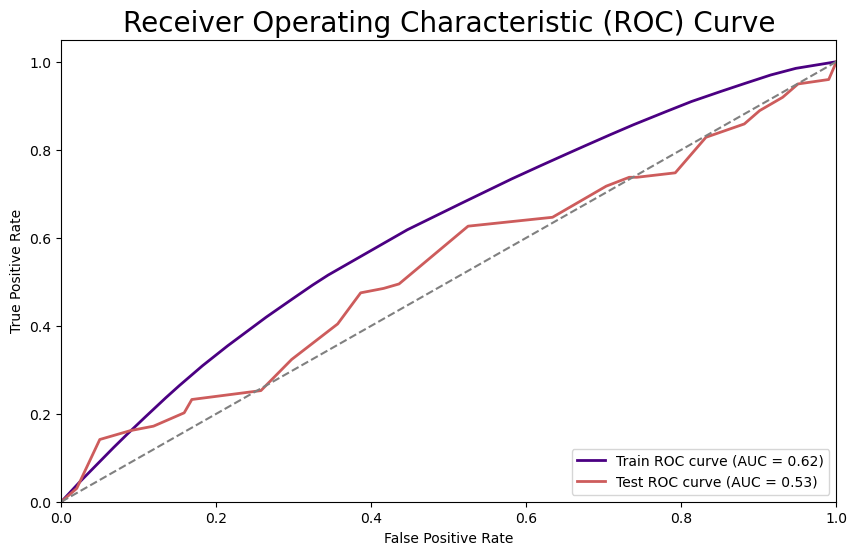

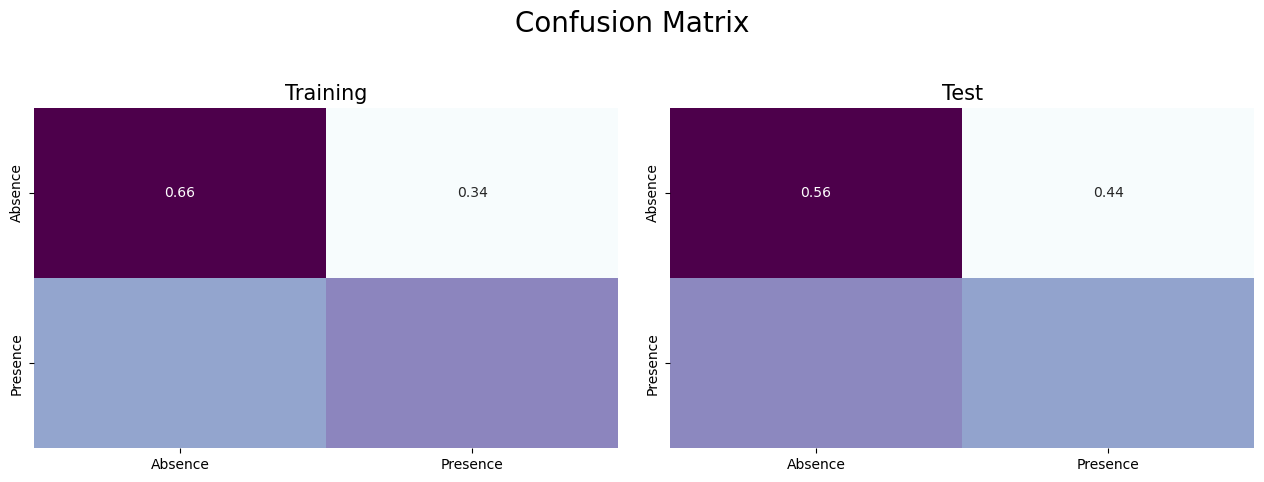

In [71]:
# performance of model fitted with selected features without hyperparameter tuning
modelPerformance(Xtrain_scaled[selected_feats], ytrain, Xtest_scaled[selected_feats], ytest, tree_base)

# <div style="text-align:left; padding:20px;color:lightgrey;margin:0;font-size:20px;font-family:Serif;display:fill;border-radius:5px;background-color:#663399;overflow:hidden"><b>Model 3 | Decision Tree Fitted with Selected Features & Hyperparameter Tuning</b></div>

In [72]:
from sklearn.model_selection import GridSearchCV

# create a Decision Tree Classifier
tree = DecisionTreeClassifier(random_state=122)

# Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4]
}

# create the GridSearchCV object
grid_search_tree = GridSearchCV(tree, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# fit the grid search to the data
grid_search_tree.fit(Xtrain_scaled[selected_feats], ytrain)

# print the best parameters and the corresponding accuracy
print('Best Parameters: ', grid_search_tree.best_params_)
print('Best AUROC: ', grid_search_tree.best_score_)

# get the best model
tree_tuned = grid_search_tree.best_estimator_

Best Parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}
Best AUROC:  0.5364428108884202


Classification Report - Training Data: 
              precision    recall  f1-score   support

     Absence       0.56      0.69      0.62       401
    Presence       0.59      0.44      0.51       398

    accuracy                           0.57       799
   macro avg       0.57      0.57      0.56       799
weighted avg       0.57      0.57      0.56       799

ClassificationReport - Test Data: 
              precision    recall  f1-score   support

     Absence       0.53      0.65      0.59       101
    Presence       0.54      0.41      0.47        99

    accuracy                           0.54       200
   macro avg       0.54      0.53      0.53       200
weighted avg       0.54      0.54      0.53       200



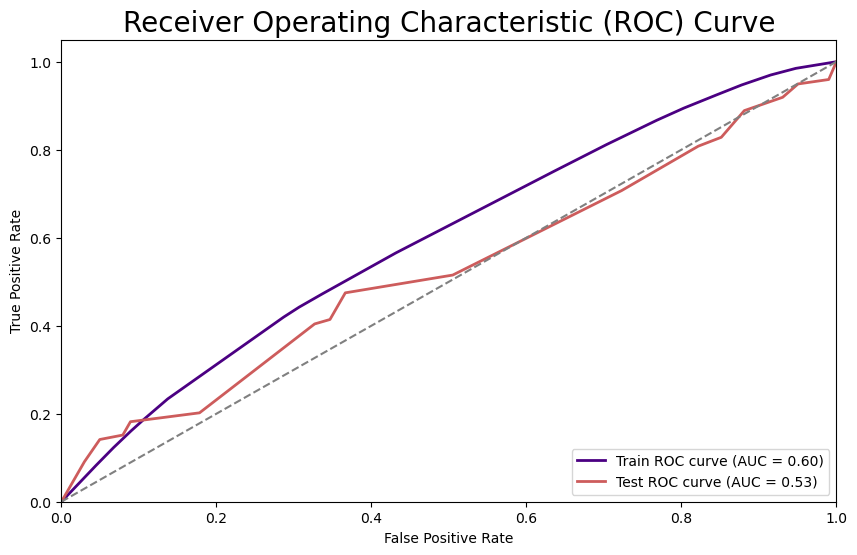

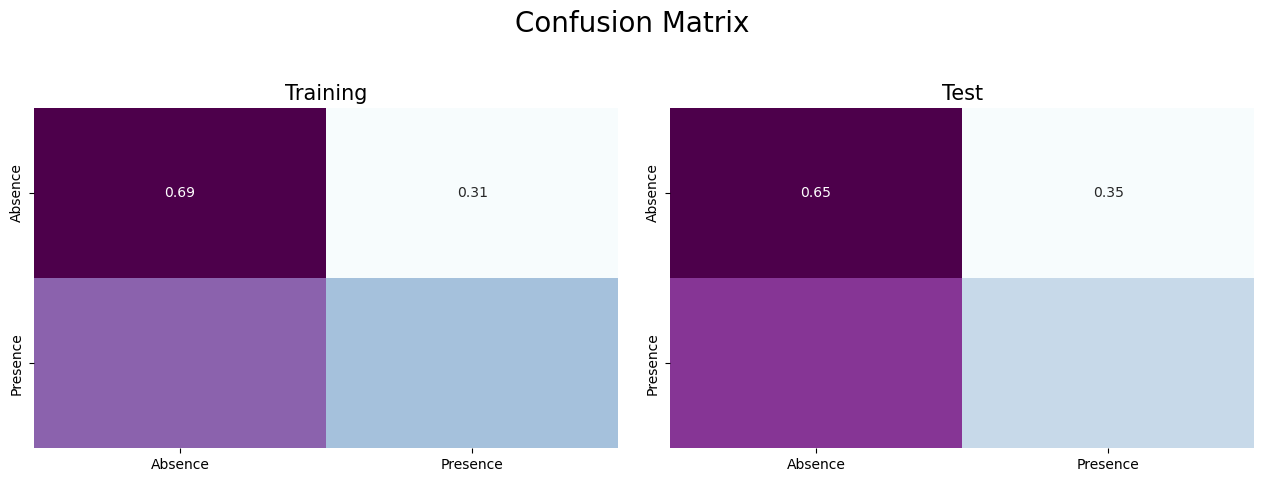

In [73]:
# performance of model fitted with selected features with hyperparameter tuning
modelPerformance(Xtrain_scaled[selected_feats], ytrain, Xtest_scaled[selected_feats], ytest, tree_tuned)

In [78]:
from joblib import dump

# Save the model
dump(tree_tuned, 'model.joblib')

['tree_tuned_model.joblib']